In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training/0/PrivateTest_88305.jpg")

In [3]:
img_array.shape #rgb

(48, 48, 3)

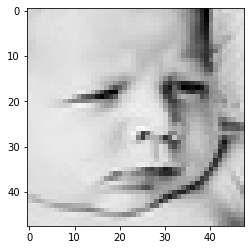

In [4]:
plt.imshow(img_array) ## BGR

In [5]:
Datadirectory = "Training/" ## training dataset

In [6]:
Classes = ["0", "1", "2", "3", "4", "5", "6"] ## list of classes => exact name of your folders

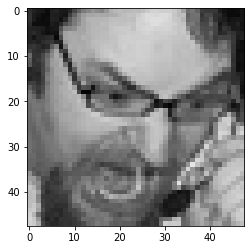

In [7]:
for category in Classes: 
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

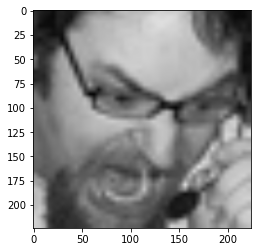

In [8]:
img_size= 224 ##ImageNet => 224 x 224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

# read all the images and convert them to array

In [10]:
training_Data = [] ## data array, put everything in an array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

7178


In [13]:
import random

random.shuffle(training_Data)

In [14]:
X = [] ## data means the feature
y = [] ## label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension

In [15]:
X.shape

(7178, 224, 224, 3)

In [16]:
# normalize the data
##for i in range(0,7178):
   ## X[i] = X[i]/255.0

X= X/255.0; ## we are normalizing it, before training should always normalize it

In [17]:
y[500]

0

# deep learning model for training - Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras ## keras is interface for tensorflow
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model

In [20]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Transfer Learning - Tuning, weights will start from Last check point

In [21]:
base_input = model.layers[0].input ## input

In [22]:
base_output = model.layers[-2].output

In [23]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [24]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of flatten
final_ouput = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput) ## 7 becuz my classes are 7, softmax cuz this is my classficition layer

In [25]:
final_output ## ouput

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [26]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [27]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [28]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
##start training model

In [29]:
##X = np.array(X)
##y = np.array(y)

In [30]:
##new_model.fit(X,y, epochs = 25)

In [1]:
##new_model.save('Final_model_testing2')

NameError: name 'new_model' is not defined

In [32]:
new_model = tf.keras.models.load_model('Final_model_testing2')

In [33]:
frame = cv2.imread("D:\FYP Project Tensorflow\happyboy.jpg")

In [34]:
print(frame)

[[[192 183 173]
  [194 185 175]
  [197 188 179]
  ...
  [176 137  93]
  [176 137  93]
  [176 137  93]]

 [[192 183 173]
  [194 185 175]
  [197 188 179]
  ...
  [174 135  91]
  [174 135  91]
  [174 135  91]]

 [[192 183 173]
  [194 185 175]
  [197 188 179]
  ...
  [172 133  88]
  [172 133  88]
  [172 133  88]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 51  46  47]
  [ 51  46  47]
  [ 51  46  47]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 51  46  47]
  [ 51  46  47]
  [ 50  45  46]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 50  45  46]
  [ 50  45  46]
  [ 50  45  46]]]


In [35]:
frame.shape

(667, 1000, 3)

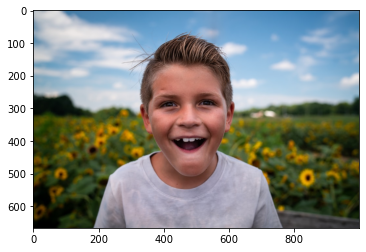

In [36]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [37]:
# start face detection algorithm now, haar cascade frontal face work now (it works in gray images)

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape

(667, 1000)

In [41]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2) ## BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

Face not detected


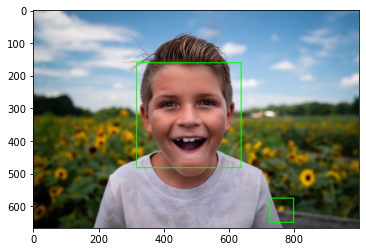

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

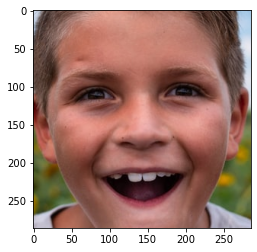

In [43]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [44]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0 ## normalizing it

In [45]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [46]:
Predictions[0]

array([3.1045647e-06, 8.5818658e-10, 1.0583193e-05, 9.9993718e-01,
       9.8133878e-06, 4.2718311e-06, 3.5007317e-05], dtype=float32)

In [47]:
np.argmax(Predictions)

3

In [ ]:
##model successfully created, able to predict emotion through facial images